### Stock Price Prediction using Stacked LSTM

#### 1) We will collect the stocks data - AAPL
#### 2) Preprocess the data - Train & Test
#### 3) Create an Stacked LSTM model
#### 4) Predict the test data and plot the output
#### 5) Predict the Future 30 days and plot the output


In [6]:
# Data Collection

import pandas_datareader as pdr
import pandas as pd

In [7]:
# Fetching Apple stocks data using API

import requests
headers = {
    'Content-Type': 'application/json'
}
response = requests.get("https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2015-1-1&endDate=2024-1-1&token=b1ab3b096f8156cc006b0c83b06decdd0290b522", headers=headers)
print(response.json)


<bound method Response.json of <Response [200]>>


In [8]:
# Decode the response content from bytes to a string
data_str = response.content.decode('utf-8')
    
# Parse the JSON response into a Python dictionary
data = response.json()

# Add a missing field with a default value to each record
default_value = "AAPL"
for record in data:
    record["symbol"] = default_value

# Print the modified data (for debugging)
print(data)


[{'date': '2015-01-02T00:00:00.000Z', 'close': 109.33, 'high': 111.44, 'low': 107.35, 'open': 111.39, 'volume': 53204626, 'adjClose': 24.4340663602, 'adjHigh': 24.9056284202, 'adjLow': 23.9915578869, 'adjOpen': 24.8944539638, 'adjVolume': 212818504, 'divCash': 0.0, 'splitFactor': 1.0, 'symbol': 'AAPL'}, {'date': '2015-01-05T00:00:00.000Z', 'close': 106.25, 'high': 108.65, 'low': 105.41, 'open': 108.29, 'volume': 64285491, 'adjClose': 23.7457198461, 'adjHigh': 24.2820937532, 'adjLow': 23.5579889786, 'adjOpen': 24.2016376672, 'adjVolume': 257141964, 'divCash': 0.0, 'splitFactor': 1.0, 'symbol': 'AAPL'}, {'date': '2015-01-06T00:00:00.000Z', 'close': 106.26, 'high': 107.43, 'low': 104.63, 'open': 106.54, 'volume': 65797116, 'adjClose': 23.7479547374, 'adjHigh': 24.0094370171, 'adjLow': 23.3836674588, 'adjOpen': 23.8105316932, 'adjVolume': 263188464, 'divCash': 0.0, 'splitFactor': 1.0, 'symbol': 'AAPL'}, {'date': '2015-01-07T00:00:00.000Z', 'close': 107.75, 'high': 108.2, 'low': 106.695, 'o

In [9]:
# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('AAPL_data.csv', index=False)

print("Data has been saved to AAPL_data.csv")

Data has been saved to AAPL_data.csv


In [10]:
df = pd.read_csv('AAPL_data.csv');

In [11]:
df.head(5)

date   close    high      low    open    volume  \
0  2015-01-02T00:00:00.000Z  109.33  111.44  107.350  111.39  53204626   
1  2015-01-05T00:00:00.000Z  106.25  108.65  105.410  108.29  64285491   
2  2015-01-06T00:00:00.000Z  106.26  107.43  104.630  106.54  65797116   
3  2015-01-07T00:00:00.000Z  107.75  108.20  106.695  107.20  40105934   
4  2015-01-08T00:00:00.000Z  111.89  112.15  108.700  109.23  59364547   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  \
0  24.434066  24.905628  23.991558  24.894454  212818504      0.0   
1  23.745720  24.282094  23.557989  24.201638  257141964      0.0   
2  23.747955  24.009437  23.383667  23.810532  263188464      0.0   
3  24.080954  24.181524  23.845173  23.958035  160423736      0.0   
4  25.006199  25.064306  24.293268  24.411717  237458188      0.0   

   splitFactor symbol  
0          1.0   AAPL  
1          1.0   AAPL  
2          1.0   AAPL  
3          1.0   AAPL  
4          1.0   AAPL

In [12]:
# Bringing the symbol column from Last position to First

# Extract Last Column
last_column = df.iloc[:, -1]

# Remove Last Column
df = df.iloc[:, :-1]

# Insert Column at the Beginning
df.insert(0, 'symbol', last_column)

# Replace 'new_data.csv' with your desired file path
df.to_csv('Modified_AAPL_data.csv', index=False)

# Display the modified DataFrame
df.head(5)

symbol                      date   close    high      low    open    volume  \
0   AAPL  2015-01-02T00:00:00.000Z  109.33  111.44  107.350  111.39  53204626   
1   AAPL  2015-01-05T00:00:00.000Z  106.25  108.65  105.410  108.29  64285491   
2   AAPL  2015-01-06T00:00:00.000Z  106.26  107.43  104.630  106.54  65797116   
3   AAPL  2015-01-07T00:00:00.000Z  107.75  108.20  106.695  107.20  40105934   
4   AAPL  2015-01-08T00:00:00.000Z  111.89  112.15  108.700  109.23  59364547   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  24.434066  24.905628  23.991558  24.894454  212818504      0.0          1.0  
1  23.745720  24.282094  23.557989  24.201638  257141964      0.0          1.0  
2  23.747955  24.009437  23.383667  23.810532  263188464      0.0          1.0  
3  24.080954  24.181524  23.845173  23.958035  160423736      0.0          1.0  
4  25.006199  25.064306  24.293268  24.411717  237458188      0.0          1.0

In [13]:
df.tail(5)

symbol                      date   close    high      low    open  \
2259   AAPL  2023-12-22T00:00:00.000Z  193.60  195.41  192.970  195.18   
2260   AAPL  2023-12-26T00:00:00.000Z  193.05  193.89  192.830  193.61   
2261   AAPL  2023-12-27T00:00:00.000Z  193.15  193.50  191.090  192.49   
2262   AAPL  2023-12-28T00:00:00.000Z  193.58  194.66  193.170  194.14   
2263   AAPL  2023-12-29T00:00:00.000Z  192.53  194.40  191.725  193.90   

        volume    adjClose     adjHigh      adjLow     adjOpen  adjVolume  \
2259  37149570  193.354276  195.161978  192.725075  194.932270   37149570   
2260  28919310  192.804974  193.643908  192.585253  193.364263   28919310   
2261  47899806  192.904847  193.254403  190.847462  192.245685   47899806   
2262  34049898  193.334301  194.412930  192.924822  193.893590   34049898   
2263  42672148  192.285634  194.153260  191.481656  193.653895   42672148   

      divCash  splitFactor  
2259      0.0          1.0  
2260      0.0          1.0  
2261      0.0          1.0  
2262      0.0          1.0  
2263      0.0          1.0

In [14]:
df1 = df.close

In [15]:
df1

0       109.33
1       106.25
2       106.26
3       107.75
4       111.89
         ...  
2259    193.60
2260    193.05
2261    193.15
2262    193.58
2263    192.53
Name: close, Length: 2264, dtype: float64

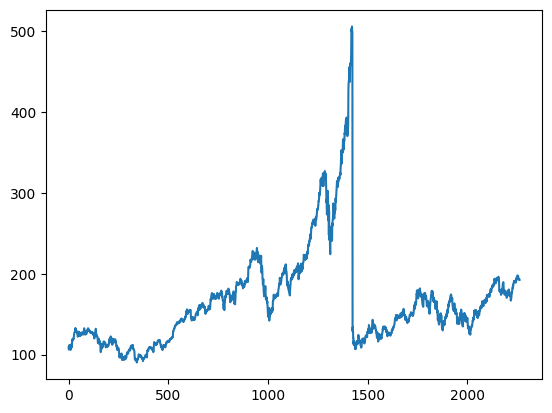

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
### LSTM are sensitive to the scale of the data. So we apply MinMax scaler 
import numpy as np

###Importing MinMaxScaler: The code imports the MinMaxScaler class from the sklearn.preprocessing module, which is used for scaling features to a specified range.
from sklearn.preprocessing import MinMaxScaler

###Initializing the Scaler: The code initializes an instance of MinMaxScaler named scaler, specifying the desired feature range as (0, 1).
scaler=MinMaxScaler(feature_range=(0,1))

###Scaling the Data: The fit_transform() method of the MinMaxScaler object is used to scale the data in df1. The np.array(df1).reshape(-1,1) part converts the data in df1 to a numpy array and reshapes it to have one column. 
###This is required because MinMaxScaler expects the input to be a 2D array with shape (n_samples, n_features).
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.04567649]
 [0.03826819]
 [0.03829224]
 ...
 [0.24728803]
 [0.24832231]
 [0.24579675]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1471, 793)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []    #This line initializes two empty lists, dataX and dataY, which will be used to store input and output data for the dataset.
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(1370, 100)
(1370,)


(None, None)

In [42]:
print(X_test.shape), print(y_test.shape)

(692, 100)
(692,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0241 - val_loss: 0.0034
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0067 - val_loss: 4.9107e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0052 - val_loss: 4.0362e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0035 - val_loss: 4.0202e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0046 - val_loss: 2.9574e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0027 - val_loss: 2.5107e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0027 - val_loss: 3.4299e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0024 - val_loss: 4.9376e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0023 - val_loss: 3.0107e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0013 - val_loss: 2.4513e-04
Epoch

In [48]:
import tensorflow as tf

In [49]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [50]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

190.97112281448975

In [53]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

157.29950193776355

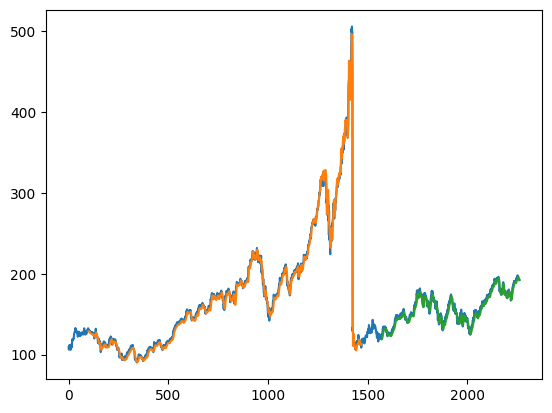

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

793

In [89]:
x_input=test_data[493:].reshape(1,-1)
x_input.shape

(1, 300)

In [90]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [91]:
temp_input

[0.12760072158749242,
 0.13693325315694527,
 0.14217678893565838,
 0.14912808177991582,
 0.14193625977149726,
 0.1309921828021648,
 0.15730607336139507,
 0.15153337342152734,
 0.1450631389055923,
 0.1315453998797354,
 0.11675285628382437,
 0.11555021046301861,
 0.11684906794948885,
 0.11824413710162357,
 0.10710763680096214,
 0.13597113650030068,
 0.14277811184606132,
 0.13936259771497295,
 0.1435959110042092,
 0.1405892964521948,
 0.1452315093205051,
 0.14660252555622366,
 0.1387131689717378,
 0.14393265183403486,
 0.1460733613950691,
 0.13895369813589897,
 0.12959711365003007,
 0.12226097414311482,
 0.13876127480457007,
 0.13943475646422127,
 0.1382321106434155,
 0.13539386650631385,
 0.12644618159951893,
 0.12170775706554415,
 0.12582080577269994,
 0.12464221286831023,
 0.13024654239326516,
 0.13260372820204447,
 0.1271677690920024,
 0.1110282621767889,
 0.10624173180998192,
 0.10109440769693323,
 0.10092603728202043,
 0.10850270595309675,
 0.10075766686710758,
 0.09986770895971137,

In [92]:
# demonstrate prediction for next 90 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<90):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24407387]
301
1 day input [0.13693325 0.14217679 0.14912808 0.14193626 0.13099218 0.15730607
 0.15153337 0.14506314 0.1315454  0.11675286 0.11555021 0.11684907
 0.11824414 0.10710764 0.13597114 0.14277811 0.1393626  0.14359591
 0.1405893  0.14523151 0.14660253 0.13871317 0.14393265 0.14607336
 0.1389537  0.12959711 0.12226097 0.13876127 0.13943476 0.13823211
 0.13539387 0.12644618 0.12170776 0.12582081 0.12464221 0.13024654
 0.13260373 0.12716777 0.11102826 0.10624173 0.10109441 0.10092604
 0.10850271 0.10075767 0.09986771 0.09546603 0.08586891 0.0944558
 0.0952255  0.08353578 0.0866386  0.08341551 0.09447986 0.09575466
 0.09714973 0.10378833 0.10359591 0.10684305 0.1096813  0.10792544
 0.10806975 0.11432351 0.12211666 0.12553217 0.12392063 0.12897174
 0.13371016 0.12666266 0.12976548 0.13250752 0.14547204 0.15432351
 0.14766085 0.15468431 0.14811786 0.1455923  0.14592904 0.15276007
 0.15119663 0.1563199  0.15242333 0.14963319 0.13984366 0.14087793
 0.14205652 0.13558629 0.13849669 

In [93]:
day_new=np.arange(1,301)
day_pred=np.arange(301,391)

In [94]:
import matplotlib.pyplot as plt

In [95]:
len(df1)

2264

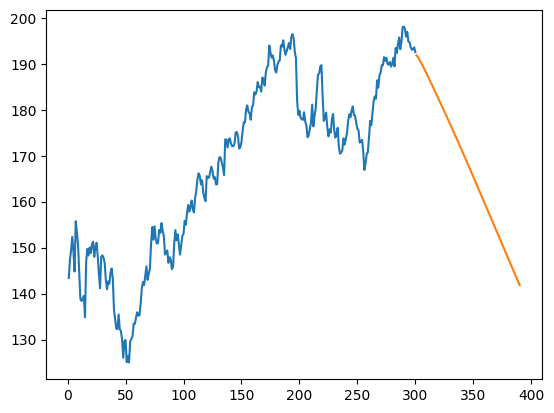

In [96]:
plt.plot(day_new,scaler.inverse_transform(df1[1964:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

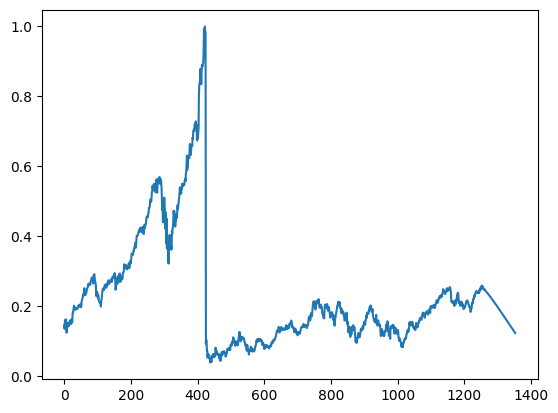

In [97]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [98]:
df3=scaler.inverse_transform(df3).tolist()

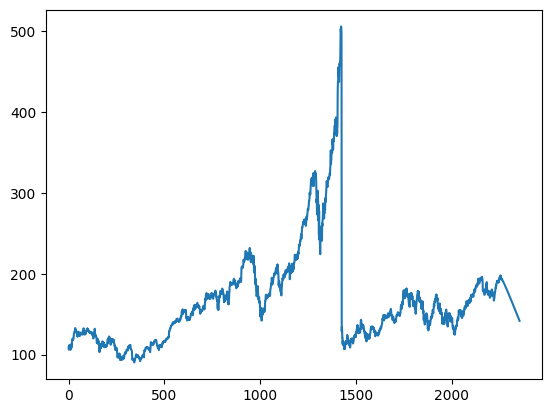

In [99]:
plt.plot(df3)